### Two level atom

We import all the functions of FAST and some other useful stuff.

In [1]:
from fast.all import *
%matplotlib inline
from matplotlib import pyplot
from fast.config import parallel, use_netcdf
from numpy import array

We establich the basic characteristics of te experiment. The path where we will work, and the name of the experiment.

In [2]:
path='./1-two_level_atom/'
name='suite'

The number of states.

In [3]:
Ne=2

The properties of the atom. The frequencies $\omega_i$ of the energy levels $E_i=\hbar \omega_i$.

In [4]:
omega_states=[0.0,100.0]

And from these the matrix of transition frequencies is calculated $\omega_{ij}=\omega_i-\omega_j$.

In [5]:
omega=[[omega_states[i]-omega_states[j] for j in range(Ne)] for i in range(Ne)]
print array(omega)

[[   0. -100.]
 [ 100.    0.]]


Te matrix $\gamma_{ij}$ of decay frequencies for transitions $|i\rangle \rightarrow |j\rangle$.

In [6]:
gamma=1.0
gamma=[[0.,-gamma],[gamma,0.]]
print array(gamma)

[[ 0. -1.]
 [ 1.  0.]]


The matrix form of the position operator $\hat{\vec{r}}$ in the helicity basis (in Bohr radii).

In [7]:
r=[ [[0,1],[1,0]] for p in range(3)]
print array(r)

[[[0 1]
  [1 0]]

 [[0 1]
  [1 0]]

 [[0 1]
  [1 0]]]


We define the lasers.

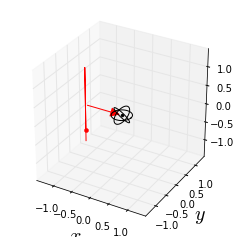

In [8]:
l1=PlaneWave(0,pi/2,0,0,color="red")
laseres=[l1]
Nl=len(laseres)

fig = pyplot.figure(); ax = fig.gca(projection='3d')
draw_lasers_3d(ax,laseres,path+'lasers.png')

We specify the coupling of the lasers. In this case, the transition $|1\rangle \rightarrow |2\rangle$ is coupled by laser $1$.

In [9]:
Lij=[[1,2,[1]]]
Lij=formatLij(Lij,Ne)

We make a diagram level.

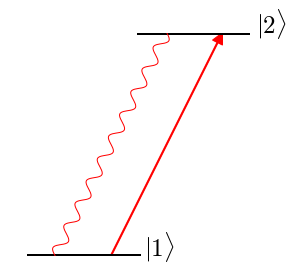

In [10]:
fig=pyplot.figure(); ax=fig.add_subplot(111,aspect="equal")

p1=[0.5,1]; p2=[1.5,3]
draw_state(ax,p1,text=r"$|1\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)
draw_state(ax,p2,text=r"$|2\rangle$",l=1.0,alignment='right',label_displacement=0.05,fontsize=25,linewidth=4.0)

excitation(ax,[p1[0]+0.25,p1[1]],[p2[0]+0.25,p2[1]], fc="red", ec="red",width=0.01, head_width=0.1, head_length=0.1)
decay(     ax,[p1[0]-0.25,p1[1]],[p2[0]-0.25,p2[1]], 0.05,10.0,color="red",linewidth=1.0)

pyplot.axis('off')
pyplot.savefig(path+name+'_diagram.png',bbox_inches="tight")

## Time evolution

We write the Fortran code of the experiment.

In [11]:
write_evolution(path,name+"_evolution",laseres,omega,gamma,r,Lij)

0.062126874923706055

We compile it.

In [12]:
compile_code(path,name+"_evolution",lapack=True,parallel=parallel)

0.39354681968688965

We specify the intensity of the laser (as the electric field amplitude). And the detuning.

In [13]:
delta1=-1.0; E00=1.0

We run the time evolution with these parameters.

In [14]:
run_evolution(path,name+"_evolution",[E00],[delta1],  2000,  0.01,Ne,use_netcdf=use_netcdf)

0.0346379280090332

We read the results.

In [15]:
t,rho22,rho21_real,rho21_imag = read_result(path,name+"_evolution",N=Ne,use_netcdf=use_netcdf)

We plot the components we have just read.

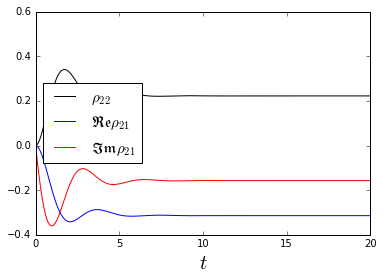

In [16]:
fig=pyplot.figure(); ax=fig.add_subplot(111)
ax.plot(t,rho22,'k-'      ,label=r"$\rho_{22}$")
ax.plot(t,rho21_real,'b-' ,label=r"$\mathfrak{Re}\rho_{21}$")
ax.plot(t,rho21_imag,'r-' ,label=r"$\mathfrak{Im}\rho_{21}$")

ax.set_ylim([None,0.6])
ax.legend(loc=0,fontsize=15)
ax.set_xlabel(r"$t$",fontsize=20)

pyplot.savefig(path+'evolution_evo.png',bbox_inches='tight',figsize=25)

We run the time evolution many times now varying the detuning of the laser.

In [17]:
run_evolution(path,name+"_evolution",[E00],[-20.0],  2000,  0.01,Ne,spectrum_of_laser=1,N_delta=401,frequency_end=20.0,use_netcdf=use_netcdf)

delta,rho22,rho21_real,rho21_imag = read_result(path,name+"_evolution",N=Ne,use_netcdf=use_netcdf)

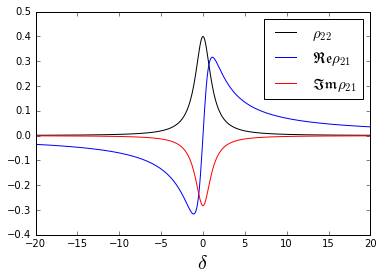

In [18]:
fig=pyplot.figure(); ax=fig.add_subplot(111)
ax.plot(delta,rho22,'k-'		,label=r"$\rho_{22}$")
ax.plot(delta,rho21_real,'b-'	,label=r"$\mathfrak{Re}\rho_{21}$")
ax.plot(delta,rho21_imag,'r-'	,label=r"$\mathfrak{Im}\rho_{21}$")
ax.legend(loc=0,fontsize=15)
ax.set_xlabel(r"$\delta$",fontsize=20)

ax.set_xlim([-20,20])
pyplot.savefig(path+'spectrum_'+name+'_evolution.png',bbox_inches='tight')

## Steady state

We write the Fortran code of the experiment.

In [19]:
write_stationary(path,name+"_steady",laseres,omega,gamma,r,Lij)

0.024877071380615234

We compile it.

In [20]:
compile_code(path,name+"_steady",lapack=True, parallel=parallel)

0.2084360122680664

We explain the initial detuning and the electric field amplitude.

In [21]:
delta=-20; E00=1.0

We run the spectroscopy.

In [22]:
run_stationary(path,name+"_steady",[E00],[delta],spectrum_of_laser=1,N_delta=401,frequency_end=20.0,use_netcdf=use_netcdf)
delta,rho22,rho21_real,rho21_imag = read_result(path,name+"_steady",N=Ne,use_netcdf=use_netcdf)

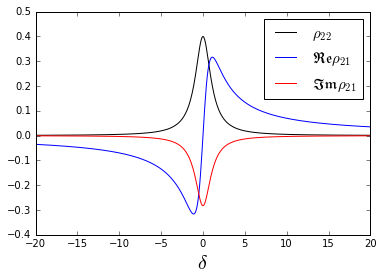

In [23]:
fig=pyplot.figure(); ax = fig.add_subplot(111)
ax.plot(delta,rho22,'k-'		,label=r"$\rho_{22}$")
ax.plot(delta,rho21_real,'b-'	,label=r"$\mathfrak{Re}\rho_{21}$")
ax.plot(delta,rho21_imag,'r-'	,label=r"$\mathfrak{Im}\rho_{21}$")
ax.legend(loc=0,fontsize=15)
ax.set_xlabel(r"$\delta$",fontsize=20)

ax.set_xlim([-20,20])
pyplot.savefig(path+'spectrum_'+name+'.png',bbox_inches='tight')

### Power broadening.

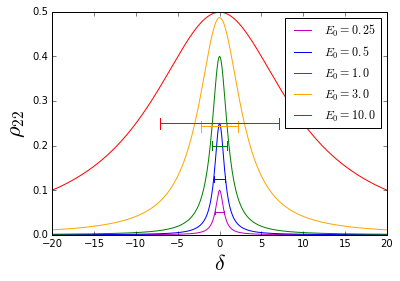

In [24]:
delta1=-20.0

fig=pyplot.figure(); ax = fig.add_subplot(111)
E0=[0.25, 0.5, 1.0, 3.0, 10.0]
colors=['m','b','g',"orange",'r']
for i in range(len(E0)):
	
	run_stationary(path,name+"_steady",[E0[i]],[delta1],spectrum_of_laser=1,N_delta=401,frequency_end=20.0,use_netcdf=use_netcdf)
	delta,rho22,rho21_real,rho21_imag = read_result(path,name+"_steady",N=Ne,use_netcdf=use_netcdf)
	
	ax.plot(delta,rho22,'-',color=colors[i],label=r"$E_0="+str(E0[i])+"$")
	
	Omega=E0[i]
	gamma=1.0
	hwfm=sqrt(gamma**2+ 2*(Omega)**2)/2
	
	ax.plot([-hwfm,hwfm],[rho22[200]/2,rho22[200]/2],color=colors[i])
	a=0.025
	ax.plot([-hwfm,-hwfm],[rho22[200]/2+a*rho22[200],rho22[200]/2-a*rho22[200]],color=colors[i])
	ax.plot([ hwfm, hwfm],[rho22[200]/2+a*rho22[200],rho22[200]/2-a*rho22[200]],color=colors[i])

ax.legend(loc=0,fontsize=12)
ax.set_xlim([-20,20])
ax.set_xlabel(r"$\delta$",fontsize=22)
ax.set_ylabel(r"$\rho_{22}$",fontsize=22)

pyplot.savefig(path+name+'_power_broadening.png',bbox_inches='tight')